# IMM - Taller No 5 (03/10/2023)

---
---
## 1. Elementos básicos de python

- *Sintaxis*: comandos, identación (sangría)
- *Variables*: variables lógicas, listas (indexación, concatenación)
- *Estructuras condicionales*: $\texttt{if}\dots\texttt{elif}\dots\texttt{else}$
- *Estructuras cíclicas*: $\texttt{for}$, $\texttt{while}$
- *Funciones*: definición y llamado
- *Gráficos*: módulo gráfico $\texttt{matplotlib.pyplot}$
  - Guardar gráficas a archivos: $\texttt{plt.savefig()}$
- *Arreglos*: librería numpy; definición, operaciones y funciones con arreglos
  - $\texttt{np.array()}$, $\texttt{np.linspace()}$ y $\texttt{np.arange()}$
- Almacenar datos en archivos: formato CSV,
 $\texttt{np.savetxt()}$


---
###1.1 Repaso última sesión

**1.1.1 La librería NumPy**



- ¿Qué es  NumPy?
- En python, ¿qué es un arreglo?
- ¿Cuáles son los elementos mínimos necesarios para almacenar en un archivo de texto los datos contenidos en uno o varios arreglos?

**1.1.2 Uso de los arreglos para graficar y almacenar datos**


**Ejercicio anterior: Compresión isotérmica de un gas ideal**

Un gas ideal obedece a la ecuación de estado
$$P\,V = n\,R\,T,$$
mediante la cual se establece la interdependencia entre la presión $(P)$, el volumen $(V)$ y la temperatura absoluta $(T)$ de $n$ moles de gas; $R$ es la constante universal de los gases. Si la temperatura se mantiene constante y el gas se comprime o se expande, su presión y volumen variarán según la ley de Boyle,
$$P\,V = \text{cte}.$$

El trabajo mecánico necesario para realizar este [proceso isotérmico](http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/isoth.html) está dado por
$$\Delta W = -n\,R\,T\,\ln\left(\frac{V_2}{V_1} \right)$$
donde
- $W$ es el trabajo mecánico realizado por un agente externo sobre el gas ($\text{J}$)
- $V_1$ es el volumen al inicio del proceso $(\text{m}^3)$
- $V_2$ es el volumen al final del proceso $(\text{m}^3)$
- $n$ es la cantidad de gas $(\text{mol})$
- $T$ es la temperatura absoluta $(\text{K})$
- $R$ es la constante universal de los gases $\left(\text{J}\cdot\text{mol}^{-1}\cdot\text{K}^{-1}\right)$.




- **Problema:**

> 1. Defina las siguientes funciones:
 - una función que permita evaluar el trabajo mecánico $\Delta  W$ tomando como argumentos de entrada $T$, $n$, $V_2$, $V_1$ y $R$
 - una función que permita evaluar la presión del gas  $P$ tomando como argumentos de entrada $T$, $n$, $V$ y $R$

> 2. Usando arreglos adecuados, evalúe la presión y el trabajo mecánico para el rango
$0.4 \le V_2 \le 1.6~\text{m}^3$ de un sistema de $n=42~\text{mol}$ de gas en un volumen inicial $V_1 = 1.0~\text{m}^{3}$ a $T=20^\circ\text{C}$.

> - Nota: Recuerde que $T [\text{K}] = T [^\circ\text{C}] + 273.15$ $~$y$~$ $R = 8.31~\text{J}\cdot\text{K}^{−1}\cdot\text{mol}^{−1}$

> 3. Almacene los arreglos de datos obtenidos en un archivo de texto de tres columnas que contenga (i) el volumen final $V_2$, (ii) la presión $P$ y (iii) el trabajo mecánico $\Delta W$. El nombre del archivo debe ser "compresion_isotermica.dat"

> 4. Grafique la curvas $P$ vs $V_2$ y $\Delta W$ vs $V_2$  en el rango solicitado  y guardelas, respectivamente, en los archivos "ley_boyle.png" y "compresion_isotermica.png"

- **Solución**:

In [ ]:
# PRIMER PUNTO: DEFINICION DE LAS FUNCIONES DE INTERÉS

# Importa las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# Funciones
def trabajo_isotermico(T_kel, n_mol, vol_fin, vol_ini, R_gas):
  # Define el trabajo de compresión isotérmica
  # Los argumentos deben darse en las unidades adecuadas
  delta_W = - n_mol*R_gas*T_kel*np.log(vol_fin/vol_ini)
  return delta_W

def presion_gas(T_kel, n_mol, volumen, R_gas):
  # Define el trabajo de compresión isotérmica
  # Los argumentos deben darse en las unidades adecuadas
  #     [V]=m^3 ==> [P]=Pa
  presion =  n_mol*R_gas*T_kel/volumen
  return presion

In [ ]:
# SEGUNDO PUNTO: EVALUACIÓN DE LAS FUNCIONES

# Parámetros (en unidades adecuadas)
n    = 42    # mol
T_C  = 20    # Temperatura
R    = 8.31  # Constante universal
Vol_ini = 1.0   # Volumen inicial

T_K  = T_C + 273.15

# Rango de volumen final
Vol_fin = np.linspace(0.4,1.6,40)

# Evaluación de la presión
presion = presion_gas(T_K, n, Vol_fin, R)
# Evaluación del trabajo isotérmico
trabajo = trabajo_isotermico(T_K, n, Vol_fin, Vol_ini, R)

In [ ]:
# TERCER PUNTO: ALMACENAMIENTO DE LOS RESULTADOS NUMÉRICOS

# Prepara un arreglo con los datos en columnas para
# ser almacenados
datos_tres_columnas = np.column_stack( (Vol_fin, presion, trabajo) )
print('Primeras filas del arreglo: \n', datos_tres_columnas[0:4,:],'... \n')

# Guarda los datos escogidos en el archivo especificado
nombre_archivo = 'compresion_isotermica.dat'
encabezado = '  Vfin(m^3)   P(Pa)    W(J)'
np.savetxt(nombre_archivo, datos_tres_columnas, delimiter='\t', header = encabezado, fmt='%12.4e')

Primeras filas del arreglo: 
 [[4.00000000e-01 2.55788033e+05 9.37504814e+04]
 [4.30769231e-01 2.37517459e+05 8.61681084e+04]
 [4.61538462e-01 2.21682962e+05 7.91090881e+04]
 [4.92307692e-01 2.07827776e+05 7.25058156e+04]] ... 



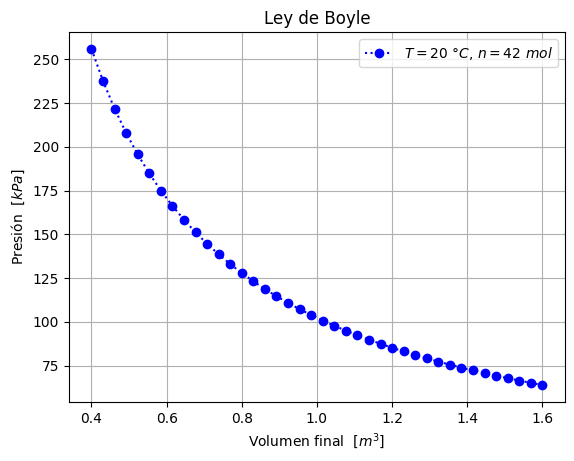

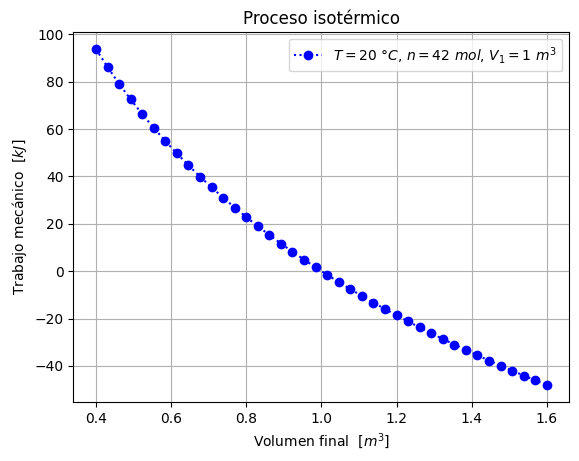

In [ ]:
# CUARTO PUNTO: GRAFICO DE LOS DATOS Y ALMACENAMIENTO

# Grafica los datos de presión -  P se presenta en unidades de kPa
plt.plot(Vol_fin, presion/1000, color='blue', marker='o', linestyle = 'dotted',label='$T=20~°C$, $n=42~mol$')
plt.title('Ley de Boyle')
plt.xlabel('Volumen final  $[m^3]$')
plt.ylabel('Presión  $[kPa]$')
plt.grid()
plt.legend()
plt.savefig('ley_boyle.png')
plt.show()

# Grafica los datos de trabajo -  W se presenta en unidades de kJ
plt.plot(Vol_fin, trabajo/1000, color='blue', marker='o', linestyle = 'dotted',label='$T=20~°C$, $n=42~mol$, $V_1=1~m^3$')
plt.title('Proceso isotérmico')
plt.xlabel('Volumen final  $[m^3]$')
plt.ylabel('Trabajo mecánico  $[kJ]$')
plt.grid()
plt.legend()
plt.savefig('compresion_isotermica.png')
plt.show()

---
###1.2 Lectura de datos de un archivo CSV



- Al realizar análisis de datos, frecuentemente es necesario "leerlos" a partir de archivos en distintos  formatos. La librería *NumPy* permite leer [archivos CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas)  fácilmente.

- Un archivo  CSV es un archivo texto plano sin formato que facilita la manipulación de datos y es más fácil de importar a una hoja de cálculo o base de datos  

**1.2.1 Importar un arreglo a partir de un archivo CSV**

- *NumPy* proporciona varias funciones para crear arreglos a partir de datos **numéricos** tabulados

- Una de ellas es  $\texttt{loadtxt()}$

- Esta función ejecuta dos bucles principales:
   - 1ro: convierte cada línea del archivo en una cadena de caracteres
   - 2do: convierte cada cadena al tipo de datos apropiado

- Sintaxis:
  ```
  arreglo_importado = np.loadtxt(nombre_archivo, delimitador)
  ```
  con
  - nombre_archivo = cadena de caracteres
  - delimitador = cadena de caracteres; los más comunes son '\t' (tabulación) y ' , ' (coma)

**Ejemplo lectura de datos:** Realizar la gráfica de $y=\cos(x^2)$ vs $x$ a partir de los datos almacenados  en el archivo [resultado_funcion.dat](https://drive.google.com/file/d/1ktSyCafENZnaqhdLnyuSepVqGcvRYbE9/view?usp=drive_link)

Para importar los datos es necesario que el archivo esté ubicado en la carpeta de trabajo de Colabs. Para ello se debe:
  - Descargar el archivo de Google Drive al PC
  - Subir el archivo al directorio de trabajo (carpeta $\texttt{content}$) usando el ícono de carpeta en la barra de la izquierda.


In [ ]:
# Los siguientes comandos de linux permiten
# chequear la estructura de nuestros archivos

# El comando "ls" permite listar las carpetas y
# los archivos guardados en la carpeta de trabajo
! ls

compresion_isotermica.dat  datos_boyle.dat	       ley_boyle.png	      sample_data
compresion_isotermica.png  datos_estatura_vs_masa.dat  resultado_funcion.dat


In [ ]:
# El comando "head" permite ver las primeras
# líneas de un archivo de texto
# En este caso la permite ver las cinco
# primeras líneas con la opción "-n5"
! head -n7 resultado_funcion.dat

#       x          y = cos(x^2)
      0.0000	      1.0000
      0.0508	      1.0000
      0.1017	      0.9999
      0.1525	      0.9997
      0.2034	      0.9991
      0.2542	      0.9979


In [ ]:
# Importa las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np

# Recupera los datos del archivo a un arreglo 2D
datos_recuperados = np.loadtxt('resultado_funcion.dat')

# Muestra las primeras filas del arreglo de datos recuperados
print('Los datos recuperados son:\n\n', datos_recuperados[0:5,:],'\n ...\n ...')

Los datos recuperados son:

 [[0.     1.    ]
 [0.0508 1.    ]
 [0.1017 0.9999]
 [0.1525 0.9997]
 [0.2034 0.9991]] 
 ...
 ...


In [ ]:
## Crea arreglos para las distintas columnas
# Nota: El encabezamiento se descarta automáticamente
arreglo_x = datos_recuperados[:,0] # La primera columna completa
arreglo_y = datos_recuperados[:,1] # La segunda columna completa

print('Primeros elementos arreglo_x =', arreglo_x[0:5],'...')
print('Primeros elementos arreglo_y =', arreglo_y[0:5],'...')

Primeros elementos arreglo_x = [0.     0.0508 0.1017 0.1525 0.2034] ...
Primeros elementos arreglo_y = [1.     1.     0.9999 0.9997 0.9991] ...


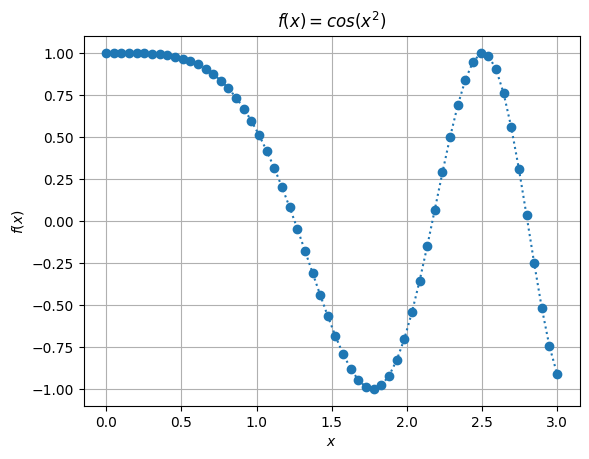

In [ ]:
# Graficar los datos recuperados
plt.plot(arreglo_x, arreglo_y, marker='o' , linestyle=':')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$f(x)=cos(x^2)$')
plt.grid()
plt.show()

---
---

## 2. Regresión lineal por mínimos cuadrados


### 2.1 Definición

La [regresión lineal](https://www.imsl.com/blog/what-is-regression-model) es una técnica de modelado estadístico que se utiliza para describir una *variable de respuesta* en función de una o más *variables predictoras*. Puede ayudar a comprender y predecir el comportamiento de sistemas complejos o analizar datos experimentales, financieros, biológicos, etc.

- En una *regresión lineal simple* se utiliza un único predictor $X$, para describir una variable de respuesta $Y$,  lo cual se realiza a través de la ecuación general
$$Y = \beta_0 + \beta_1\,X + \epsilon,$$
en la que $\beta_0$ (*intercepto*) y $\beta_1$ (*pendiente*) son los parámetros del modelo y $\epsilon$ representa el término de error.

- Los parámetros del modelo, también llamados *coeficientes de regresión*, se deben calcular a partir del conjunto de datos u observaciones disponibles $\{(x_i,y_i),\,i=1,\dots,n\}$ y el término de error mide la diferencia entre las predicciones del modelo y las observaciones reales.

- La estimación de los parámetros $\beta_0$ y $\beta_1$ se realiza a través del *método de mínimos cuadrados*.

---
### 2.2 Método de mínimos cuadrados

* La idea del método es minimizar la suma de todas las diferencias cuadráticas entre los valores generados $(Y_i)$ por la función modelo y los correspondientes valores de los datos reales $(y_i)$.

- En otras palabras el objetivo del método es  encontrar los valores de $\beta_0$ y $\beta_1$ tales que la función  
$$E(\beta_0, \beta_1) = \sum_{i=1}^n\left[ y_i - Y_i \right]^2 = \sum_{i=1}^n\left[ y_i - (\beta_0 + \beta_1\,x_i)\right]^2$$
 tenga el mínimo valor posible.

- Para evaluar los  parámetros a partir de los datos hay que minimizar $E(\beta_0, \beta_1)$

- Al realizar el proceso de minimización de la función $E(\beta_0, \beta_1)$ se obtiene:

  - Valor estimado del intercepto:
  
  $$\beta_0  \equiv b = \frac{S_{xx}\cdot S_y  - S_{xy}\cdot S_x }{n\cdot S_ {xx} - S_x^2  } $$

   - Valor estimado de la pendiente:
  $$\beta_1   \equiv m =  \frac{n\cdot S_{xy} - S_x\cdot S_y }{n\cdot S_{xx}- S_x^2}, \color{white}{........} $$

- En las expresiones anteriores  se han definido las siguientes sumatorias
  $$ S_x = \sum_{i=1}^{n} x_i, \hspace{3ex}  
  S_y =   \sum_{i=1}^{n} y_i, \hspace{3ex}
  S_{xx} =   \sum_{i=1}^{n} x_i^2, \hspace{3ex}
  S_{xy} = \sum_{i=1}^{n} x_i y_i, $$

  las cuales se calculan usando los datos disponibles $\{(x_i,y_i)\}$.



---
### 3.3 Ejemplo

En el archivo [datos_estatura_vs_masa.dat](https://drive.google.com/file/d/13Gdsd_kE5WbCaZv7SVnhfAh3k50FvZYW/view?usp=drive_link) se muestran algunas medidas de estatura y masa corporal que se tomaron a un determinado grupo de personas practicantes de baloncesto.

**Problema**

- Determine una relación entre la estatura (*variable predictora*) y la masa corporal (*variable de respuesta*) para el grupo de personas seleccionadas. No olvide indicar las unidades de los parámetros del modelo ($\beta_0$ y $\beta_1$)


**Solución**

> **1. Datos de entrada - Lectura y visualización**

>  Antes de empezar con un análisis de regresión es importante hacer un análisis exploratorio de los datos. En el caso de que se tenga la dependencia entre dos o tres variables, un gráfico de dispersión es apropiado para darse una primera idea de la relación entre ellas.

In [ ]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np

! head -n3 datos_estatura_vs_masa.dat
# Recupera los datos del archivo a un arreglo 2D
datos_archivo = np.loadtxt('datos_estatura_vs_masa.dat')
# Muestra las primeras filas del arreglo de datos recuperados
print('Los datos recuperados son:\n\n', datos_archivo[0:5,:],'\n ...\n ...')

# Arreglos de datos representados en la tabla
estatura      = datos_archivo[:,0]
masa_corporal = datos_archivo[:,1]

# Estatura(m)   Masa_corporal(kg)
   1.55		   51
   1.57		   50
Los datos recuperados son:

 [[ 1.55 51.  ]
 [ 1.57 50.  ]
 [ 1.62 55.  ]
 [ 1.68 52.  ]
 [ 1.75 60.  ]] 
 ...
 ...


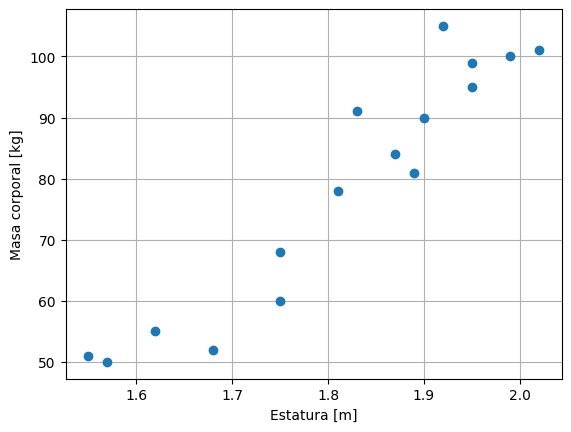

In [ ]:

# Genera una gráfica de los datos
plt.plot(estatura, masa_corporal,'o')
plt.xlabel('Estatura [m]')
plt.ylabel('Masa corporal [kg]')
plt.grid()
plt.show()


> **2. Análisis de regresión simple ("Ajuste lineal")**

>  El modelo a usar supone una relación lineal entre las variables:
   $$\text{masa_corporal} = \beta_0 + \beta_1 \cdot \text{estatura}$$

>  La evaluación de los parámetros de la regresión ($\beta_0 = $ intercepto  y $\beta_1 = $pendiente) parte de la evaluación de las sumatorias $S_x$, $S_y$, $S_{xx}$ y $S_{xy}$ definidas arriba  en términos del conjunto de datos $\{(x_i,y_i),i=1,\dots,N\}$

In [ ]:
# Evaluación de las sumatorias necesarias para
# calcular los coeficientes de regresión

# Use las funciones predeterminadas: len(), np.sum()

numero_datos = len(estatura)            # N (número de datos)
suma_x  =  np.sum(estatura)                 # Valor Sx
suma_y  =  np.sum(masa_corporal)                 # Valor Sy
suma_xx =  np.sum(estatura**2)                # Valor Sxx
suma_xy =  np.sum(estatura*masa_corporal)             # Valor Sxy

# Los dos coeficientes tienen un denominador común
denominador = numero_datos*suma_xx - suma_x**2

In [ ]:
# Evaluación de beta0 (intercepto) y beta1 (pendiente)

beta0 = (suma_y*suma_xx - suma_x*suma_xy)/denominador
beta1 = (numero_datos*suma_xy - suma_x*suma_y)/denominador


print('Modelo: masa_corporal = beta0 + beta1*estatura \n')
print('Parámetro de regresión beta0 (intercepto) = %7.3f' % beta0, 'kg \n')
print('Parámetro de regresión beta1 (pendiente)  = %7.3f' % beta1, 'kg/m ')

Modelo: masa_corporal = beta0 + beta1*estatura 

Parámetro de regresión beta0 (intercepto) = -152.168 kg 

Parámetro de regresión beta1 (pendiente)  = 127.184 kg/m 


> **3. Comparación del modelo con las observaciones**

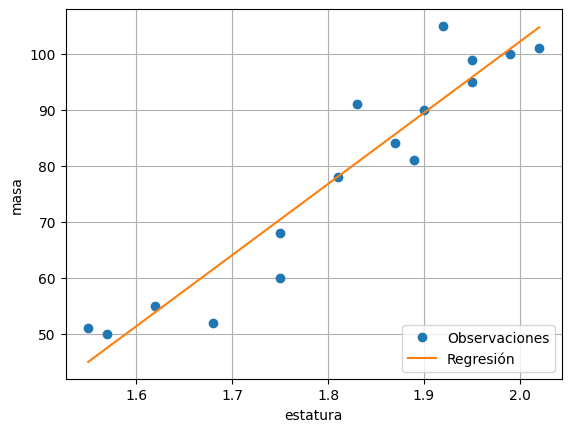

In [ ]:
# Determinación de la predicción del modelo
masa_corporal_modelo = beta0 + beta1*estatura

# Graficar el resultado de la regresión junto con los datos
plt.plot( estatura,  masa_corporal, 'o', label='Observaciones')
plt.plot( estatura,  masa_corporal_modelo, '-', label='Regresión')
plt.xlabel('estatura')
plt.ylabel('masa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

---
### 2.4 Regresion lineal usando el módulo $\texttt{scipy.stats}$

- El análisis de regresión es una tarea común por lo que los lenguajes de programación traen herramientas predeterminadas para realizarlo. En el caso de Python, la librería científica *SciPy* tiene métodos para éste y otros tipos de análisis relacionados

- [*SciPy* (*Scientific Python*)](https://scipy.org/) es una librería de computación científica que si bien está basada en *NumPy*, proporciona más funciones de utilidad para la solución de problemas de optimización, de análisis estadístico y de procesamiento de señales.

- El módulo $\texttt{scipy.stats}$ contiene una gran cantidad de herramientas relacionadas con distribuciones de probabilidad, estadísticas descriptivas, histogramas, funciones de correlación, pruebas estadísticas, regresión, etc...

- Sintaxis para importar las herramientas estadísticas
```
import scipy.stats as stat
```





In [ ]:
! pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions
        are met:
        
        1. Redistributions of source code must retain the above copyright
           notice, this list of conditions and the following disclaimer.
        
        2. Redistributions in binary form must reproduce the above
           copyright notice, this list of conditions and the following
           disclaimer in the documentation and/or other materials provided
           with the distribution.
        
        3. Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse or promote products derived

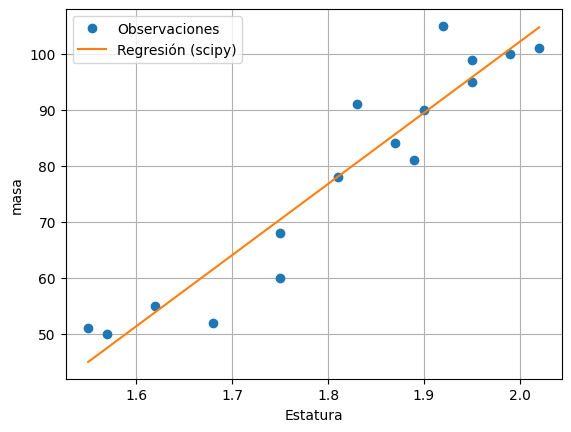

In [ ]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat # libreria para reresion lineal

# Datos a analizar (usando arreglos)
datos_x = estatura
datos_y = masa_corporal

# Evalúa la regresion lineal "y = m*x + b" usando la librería scipy
regresion_lineal = stat.linregress(datos_x, datos_y)

# Resultados del análisis (parámetros del modelo)
beta0 = regresion_lineal.intercept   # Intercepto
beta1 = regresion_lineal.slope       # Pendiente

# Valores y estimados por el modelo
modelo_y = beta0 + beta1*datos_x

# Graficar el resultado de la regresión
plt.plot(estatura, masa_corporal, 'o', label='Observaciones')   # datos
plt.plot(estatura, masa_corporal_modelo, label='Regresión (scipy)')    # modelo de regresión
plt.xlabel('Estatura')
plt.ylabel('masa')
plt.legend()
plt.grid()
plt.show()

---
---
###1.5  Ejercicio para entregar: Ley de Boyle

- La ecuación de estado de un gas ideal, la cual describe la relación entre la presión absoluta $P$, el volumen $V$, la temperatura absoluta $T$ y la cantidad de sustancia $n$ (en moles), está dada por la expresión
$$ P = \frac{n\,R\,T}{V}, $$
donde $R$ es la constante de los gases ideales.

- Se pueden obtener distintas relaciones de proporcionalidad entre las variables involucradas dependiendo de las condiciones que se mantengan fijas en un experimento:
  - Ley de Gay-Lussac: para $V$ y $n$ constantes (*procesos isocóricos*) se tiene
  $$P = C_1\, T  $$
  - Ley de Boyle: para $T$ y $n$ constantes (*procesos isotérmicos*) se tiene
  $$P = \frac{C_2}{V}  $$
  - Ley de Charles: para $P$ y $n$ constantes (*procesos isobáricos*) se tiene
  $$V = C_3\,T  $$

**Problema:**

1. Recupere los datos contenidos en el archivo “*ley_boyle.dat*”, los cuales están relacionados con las mediciones presentadas por Robert Boyle en su escrito "*New Experiments Physico-Mechanical, Touching the Spring of the Air and Its Effects*" (1660), con los cuales  demostró su hipótesis acerca de la relación entre la presión de un gas y el volumen que ocupa.
  - Descargue el archivo de Google Drive ([Carpeta "Taller05"](https://drive.google.com/drive/folders/1SMovU6XUUbhepTUKQU9XNfSV_hVCGLOC?usp=drive_link))
  - Copie/Suba el archivo al directorio de trabajo de Colabs (/content/)
  - Lea los datos usando la función $\texttt{np.loadtxt()}$
2. Grafique los datos y verifique que  la relación de proporcionalidad entre las variables de interés es de *proporcionalidad inversa* ($P = a / V$)
3. Realice una regresión lineal que le permita determinar el valor de la constante de proporcionalidad $a$. De ser necesario, realice un cambio de variables adecuado para obtener una relación lineal entre las variables transformadas. Realice la evaluación explicita de los parámtros de regresión.
4. En la misma gráfica muestre los datos leidos y  el resultado de la relación de proporcionalidad encontrada a través de la regresión. ¿El modelo obtenido por regresión describe adecuadamente los datos? Justifique su respuesta

5. Evalúe y grafique la diferencia porcentual entre los datos y  las predicciones del modelo para la presión:
$$\Delta P (\%) = 100\,  \left| \frac{P_{\rm datos} - P_{\rm modelo}}{P_{\rm data}} \frac{}{} \right|$$
¿De qué manera estos resultados ayudan a sustentar su respuesta a la pregunta del punto 4?

**Solución:**

> Primer punto:

In [ ]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np





> Segundo punto:

> Tercer punto:

...

...

....

> Cuarto punto:

> Quinto punto: